In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import warnings
warnings.filterwarnings("ignore")

Домашняя работа
Найти данные о заболеваемости/смертности/выздоровлении COVID-19 (они есть например на Kaggle) и использовать их для решения заданий. Можно использовать как данные по какому-то конкретному региону/стране, так и данные по всему миру.

Скорее всего, результат по всем задачам получится не очень.

<b>Easy</b>
Проверить ряд на стационарность. Привести ряд к стационарному виду.

Построить прогноз заболеваемости, используя модель ARIMA, на месяц вперед. Подобрать оптимальные параметры модели. Визуализировать результат. Выглядит ли такой прогноз реалистичным?

Для решения задачи можно использовать pmdarima

In [3]:
df = pd.read_csv('covid.csv', sep = ';')
df_spain = df[df['Страна'] == 'Испания']
df_s = df_spain.fillna(0).reset_index(drop=True)
df_s

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день
0,Испания,03.10.2021,4961128,0.0,86463,0,0.0,0
1,Испания,23.09.2021,4943855,0.0,86185,3031,0.0,100
2,Испания,02.03.2021,3130184,150376.0,69801,-74347,0.0,192
3,Испания,28.03.2021,3255324,150376.0,75010,0,0.0,0
4,Испания,29.06.2021,3799733,150376.0,80829,7091,0.0,40
...,...,...,...,...,...,...,...,...
299,Испания,28.05.2021,3668658,150376.0,79905,5482,0.0,17
300,Испания,03.08.2021,4523310,150376.0,81773,20327,0.0,130
301,Испания,08.07.2021,3915313,150376.0,80997,17317,0.0,28
302,Испания,01.02.2021,2822805,150376.0,59081,79686,0.0,762


In [4]:
df_s.dtypes

Страна                    object
Дата                      object
Заражений                  int64
Выздоровлений            float64
Смертей                    int64
Заражений за день          int64
Выздоровлений за день    float64
Смертей за день            int64
dtype: object

In [5]:
df_s["Дата"] = pd.to_datetime(df_s["Дата"], dayfirst=True)
df_s.dtypes

Страна                           object
Дата                     datetime64[ns]
Заражений                         int64
Выздоровлений                   float64
Смертей                           int64
Заражений за день                 int64
Выздоровлений за день           float64
Смертей за день                   int64
dtype: object

In [6]:
df_s = df_s.sort_values(by=['Дата']).reset_index(drop=True)
df_s.tail()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день
299,Испания,2021-10-27,5006675,0.0,87289,2532,0.0,51
300,Испания,2021-10-28,5008887,0.0,87322,2212,0.0,33
301,Испания,2021-10-29,5011148,0.0,87368,2261,0.0,46
302,Испания,2021-10-30,5011148,0.0,87368,0,0.0,0
303,Испания,2021-10-31,5011148,0.0,87368,0,0.0,0


In [7]:
df_s.columns.all

<bound method Index.all of Index(['Страна', 'Дата', 'Заражений', 'Выздоровлений', 'Смертей',
       'Заражений за день', 'Выздоровлений за день', 'Смертей за день'],
      dtype='object')>

In [8]:
df_s1 = df_s.drop('Страна', 1)
df_s1


,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день
0,2021-01-01,1928265,150376.0,50837,0,0.0,0
1,2021-01-02,1928265,150376.0,50837,0,0.0,0
2,2021-01-03,1928265,150376.0,50837,0,0.0,0
3,2021-01-04,1958844,150376.0,51078,30579,0.0,241
4,2021-01-05,1982544,150376.0,51430,23700,0.0,352
...,...,...,...,...,...,...,...
299,2021-10-27,5006675,0.0,87289,2532,0.0,51
300,2021-10-28,5008887,0.0,87322,2212,0.0,33
301,2021-10-29,5011148,0.0,87368,2261,0.0,46
302,2021-10-30,5011148,0.0,87368,0,0.0,0


In [9]:
df_s2 = df_s1.set_index('Дата')
df_s2

,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день
Дата,,,,,,
2021-01-01,1928265,150376.0,50837,0,0.0,0
2021-01-02,1928265,150376.0,50837,0,0.0,0
2021-01-03,1928265,150376.0,50837,0,0.0,0
2021-01-04,1958844,150376.0,51078,30579,0.0,241
2021-01-05,1982544,150376.0,51430,23700,0.0,352
...,...,...,...,...,...,...
2021-10-27,5006675,0.0,87289,2532,0.0,51
2021-10-28,5008887,0.0,87322,2212,0.0,33
2021-10-29,5011148,0.0,87368,2261,0.0,46


In [10]:
import statsmodels.tsa.stattools

In [14]:
stat, p_value, *_ = statsmodels.tsa.stattools.kpss(df_s2['Заражений'])
stat, p_value

(1.820347336087005, 0.01)

In [15]:
stat, p_value, *_ = statsmodels.tsa.stattools.kpss(df_s2['Выздоровлений'])
stat, p_value

(1.3207907303843973, 0.01)

In [16]:
stat, p_value, *_ = statsmodels.tsa.stattools.kpss(df_s2['Смертей'])
stat, p_value

(1.5777092028851485, 0.01)

У критерия KPSS нулевая гипотеза - ряд стационарен.
p-value меньше 0.05 по всем трем параметрам, нулевая гипотеза неверна, ряд нестационарен

<AxesSubplot:xlabel='Дата'>

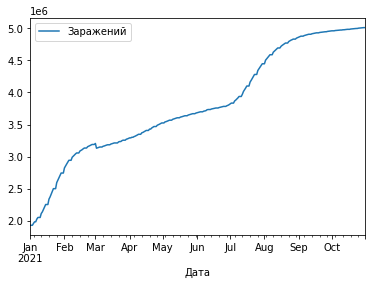

In [17]:
df_inf = df_s2[['Заражений']]
df_inf.plot()

<AxesSubplot:xlabel='Дата'>

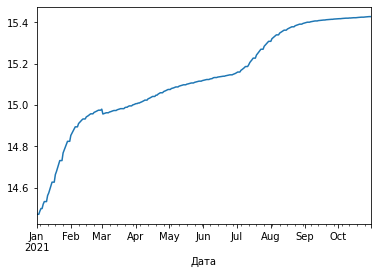

In [18]:
df_inf['log'] = np.log(df_inf['Заражений']).values
df_i = df_inf['log']
df_i.plot()

In [19]:
n_sample = len(df_i)
pivot = int(0.8 * n_sample)
x_train, x_test = df_i.iloc[:pivot], df_i.iloc[pivot:]

In [20]:
from statsmodels.tsa.arima.model import ARIMA

AIC= -2219.936986838933


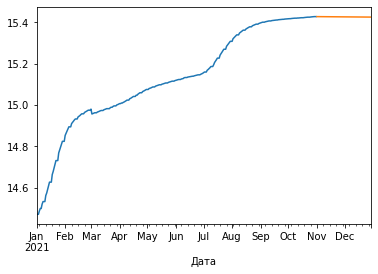

In [21]:
model_fit = ARIMA(df_i, order=(2, 0, 2)).fit()
df_i.plot()
model_fit.forecast(60).plot()
print('AIC=', model_fit.aic)

In [22]:
p_list = [2, 3, 4]
d_list = [0, 1]
q_list = [0, 1, 2]

from itertools import product

n_sample = len(df_inf)
pivot = int(0.8 * n_sample)
x_train, x_test = df_i.iloc[:pivot], df_i.iloc[pivot:]
best_aic = 10000
best_params = (None, None, None)
for p, d, q in product(p_list, d_list, q_list):
    model = ARIMA(x_train, order=(p, d, q)).fit()
    if model.aic < best_aic:
        best_aic = model.aic
        x_pred = model.forecast(len(x_test))
        best_params = (p, d, q)

In [23]:
best_params

(4, 1, 2)

AIC= -2401.307901103241


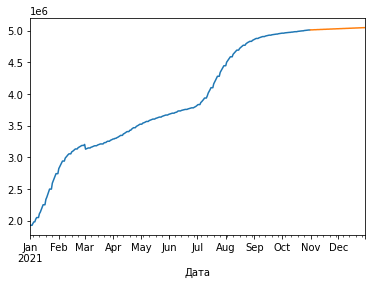

In [24]:
model_fit1 = ARIMA(df_i, order=(4, 1, 2)).fit()
pd.Series(np.exp(df_i)).plot()
pd.Series(np.exp(model_fit1.forecast(60))).plot()
print('AIC=', model_fit1.aic)

<b>Normal</b>
Применить градиентный бустинг для решения задачи. Используя кросс-валидацию, сравнить результаты ARIMA и бустинга.

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [26]:
params = {
    'n_estimators': [5, 100, 500, 1000],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'max_depth': [3, 5, 7, 10]
}

In [27]:
df_i2 = df_inf.drop('log', 1)
df_i2

,Заражений
Дата,
2021-01-01,1928265
2021-01-02,1928265
2021-01-03,1928265
2021-01-04,1958844
2021-01-05,1982544
...,...
2021-10-27,5006675
2021-10-28,5008887
2021-10-29,5011148


In [36]:
x_train, x_test = df_i2[:pivot], df_i2[pivot:]
t_train, t_test = np.arange(len(x_train)).reshape(-1, 1), np.arange(len(x_train), len(x_train) + len(x_test)).reshape(-1, 1)

r_search = RandomizedSearchCV(GradientBoostingRegressor(), params)
r_search.fit(t_train, x_train)
r_search.best_estimator_

GradientBoostingRegressor(criterion='mae', max_depth=5)

In [37]:
model_boost = GradientBoostingRegressor(criterion='mae', max_depth=5, n_estimators=500)
model_boost.fit(t_train, x_train)

GradientBoostingRegressor(criterion='mae', max_depth=5, n_estimators=500)

In [38]:
cross_val = cross_val_score(model_boost, t_train, x_train)
print('Кросс-валидация на трейн:',cross_val)
print('Среднее по кросс-валидации:', cross_val.mean())


Кросс-валидация на трейн: [-2.04329279 -0.64822841 -0.11037537 -2.18282036 -4.39855822]
Среднее по кросс-валидации: -1.8766550271345372
